In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
import glob
import time
from helperfunctions import *
from svmclassifier import *

In [2]:
# Read training data 
# Car
cars_files    = glob.glob('C://big/p5/vehicles/**/*.png', recursive=True)
# Not Car
notcars_files = glob.glob('C://big/p5/non-vehicles/**/*.png', recursive=True)

# store filenames in cars,notcars
cars=[]
notcars=[]
# search through readed data 
# read every third image to split time-series of images
for n in range(len(cars_files)):
    if n % 3 == 0:
        cars.append(cars_files[n])
#print(cars)

# Do the same for non-car data
for n in range(len(notcars_files)):
    if n % 3 == 0:
        notcars.append(notcars_files[n])
        
print('Cars size is: ',np.shape(cars))
print('Not-Cars size is: ',np.shape(notcars))

Cars size is:  (2931,)
Not-Cars size is:  (2990,)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


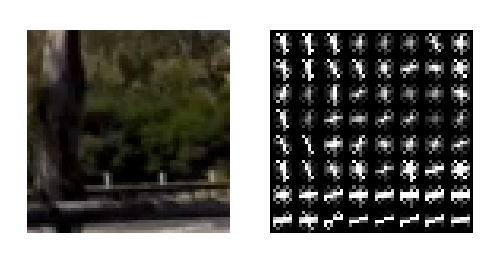

In [3]:
image = mpimg.imread('c:/big/p5/non-vehicles/Extras/extra3264.png')
%matplotlib inline
from skimage import data, color, exposure
from skimage.feature import hog

pix_per_cell = 8
cell_per_block = 2
orient = 9

features, hog_image = hog(image[:,:,0], orientations=orient, 
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image',color='white')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients',color='white')
ax1.set_adjustable('box-forced')
plt.show()

C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


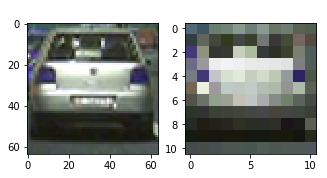

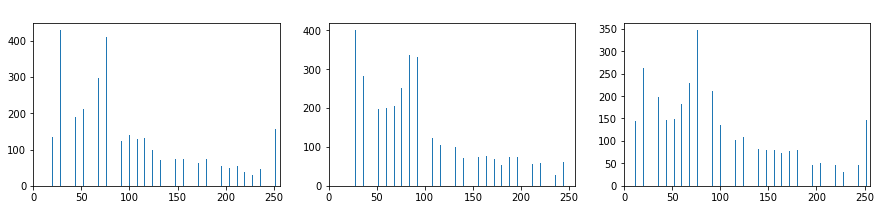

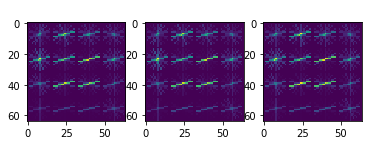

In [4]:
def binspatial(img, size, vis=False):
    '''Returns spatially bin features'''
    if vis == True:
        binspatial_features = cv2.resize(img, size)
    else:
        binspatial_features = cv2.resize(img, size).ravel()
    return binspatial_features

#Finds color histogram features
def color_hist(img , nbins, bins_range=(0,256), plot=False):
    '''Returns color histogram features or plots color histogram is flag set to True'''
    channel_1 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel_2 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel_3 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    if plot == True:
        bin_edges = channel_1[1]
        bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
        
        fig = plt.figure(figsize=(15,3))
        plt.subplot(131)
        plt.bar(bin_centers, channel_1[0])
        plt.xlim(0, 256)
        plt.title('Color Channel 1',color='white')
        plt.subplot(132)
        plt.bar(bin_centers, channel_2[0])
        plt.xlim(0, 256)
        plt.title('Color Channel 2',color='white')
        plt.subplot(133)
        plt.bar(bin_centers, channel_3[0])
        plt.xlim(0, 256)
        plt.title('Color Channel 3',color='white')
        
    elif plot == False:
        chist_features = np.concatenate((channel_1[0], channel_2[0], channel_3[0]))
        return chist_features
    
#Finds histogram of gradient features
def get_hog_features(img, orients, pixels_per_cell, cells_per_block, vis = False, feature_vec = True):
    '''Returns HOG features and/or HOG image'''
    if vis == True:
        features, hog_image = hog(img, orientations=orients, pixels_per_cell = pixels_per_cell,
                                  cells_per_block=cells_per_block, visualise=vis, 
                                  transform_sqrt=False, feature_vector=False)
        return features, hog_image 
    elif vis == False:
        features = hog(img, orientations=orients, pixels_per_cell=pixels_per_cell, 
                       cells_per_block=cells_per_block, visualise=vis, 
                       transform_sqrt=False, feature_vector=True)
    return features
    
image = cv2.imread('C:/big/p5/vehicles/GTI_MiddleClose/image0108.png')
lab_image = cv2.cvtColor(np.copy(image), cv2.COLOR_RGB2Lab)
lab_image = image
#Visualize Spatial Binning of Colors features
bin_spatial_image = binspatial(lab_image, size=(11,11), vis=True)
fig = plt.figure(figsize=(8,6))

plt.subplot(131)
plt.imshow(lab_image)
plt.title('Original Image', color='white')
plt.subplot(132)
plt.imshow(bin_spatial_image)
plt.title('Spatially Binned Image', color='white')

#Visualize Color Histogram features
color_hist(lab_image, nbins=32, bins_range=(0,256), plot=True)

#Visualize HOG Features
c1_feat, c1_img = get_hog_features(img=lab_image[:,:,0], orients=9, pixels_per_cell=(16,16), 
                                   cells_per_block=(2,2), vis = True, feature_vec = True)
c2_feat, c2_img = get_hog_features(img=lab_image[:,:,1], orients=9, pixels_per_cell=(16,16), 
                                   cells_per_block=(2,2), vis = True, feature_vec = True)
c3_feat, c3_img = get_hog_features(img=lab_image[:,:,2], orients=9, pixels_per_cell=(16,16), 
                                   cells_per_block=(2,2), vis = True, feature_vec = True)

fig = plt.figure(figsize=(6,6))

plt.subplot(131)
plt.imshow(c1_img)
plt.title('HOG Channel 1', color='white')
plt.subplot(132)
plt.imshow(c2_img)
plt.title('HOG Channel 2', color='white')
plt.subplot(133)
plt.imshow(c3_img)
plt.title('HOG Channel 3', color='white')

In [5]:
# Testing functions above - pickle_extracted_features()
cspace ='RGB'
orient = 9
pix_per_cell = 4
cell_per_block = 2 
hog_channel = 'ALL'

# Extract the features, then save a pickle file
fname = 'X_scaler_scaled_X_y.p'
if os.path.isfile(fname) == True:
    print('Already Extracted, got my pickle')
    pass
else:
    pickle_extracted_features('X_scaler_scaled_X_y.p',cars,notcars,cspace,orient,
                          pix_per_cell,cell_per_block,hog_channel)

# Test training_with_SVM()
training_with_SVM('X_scaler_scaled_X_y.p')

Already Extracted, got my pickle
5.83 Seconds to train SVC
Test Accuracy of SVC =  0.9679
Model saved as [ svc.pickle ] file
My SVC predictions: 
 [ 1.  1.  1.  0.  1.  1.  1.  0.  0.  0.]
For  10 labels: 
 [ 1.  1.  1.  0.  0.  1.  1.  0.  1.  0.]


find cars cspace is  RGB
(720, 1280, 3)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


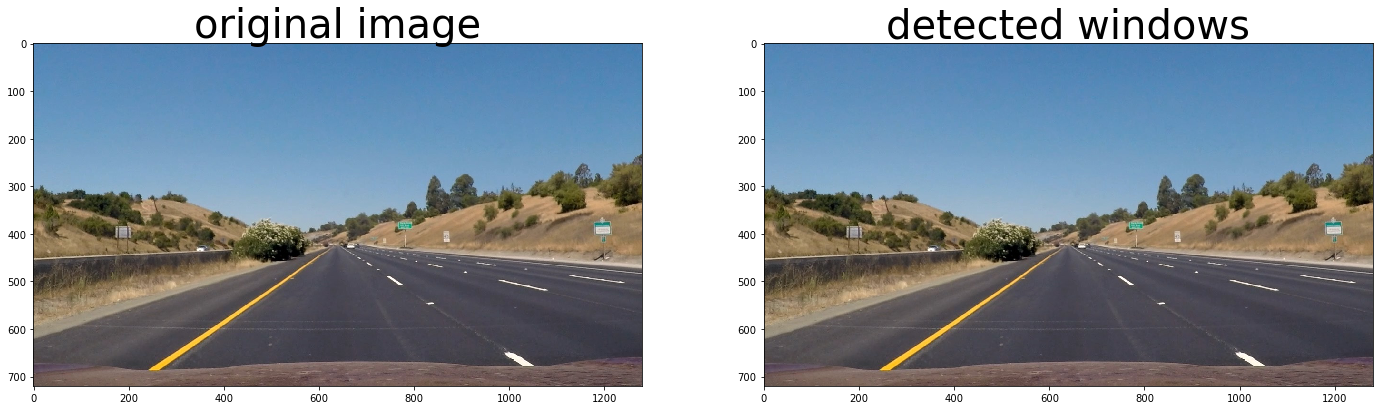

find cars cspace is  RGB
(720, 1280, 3)


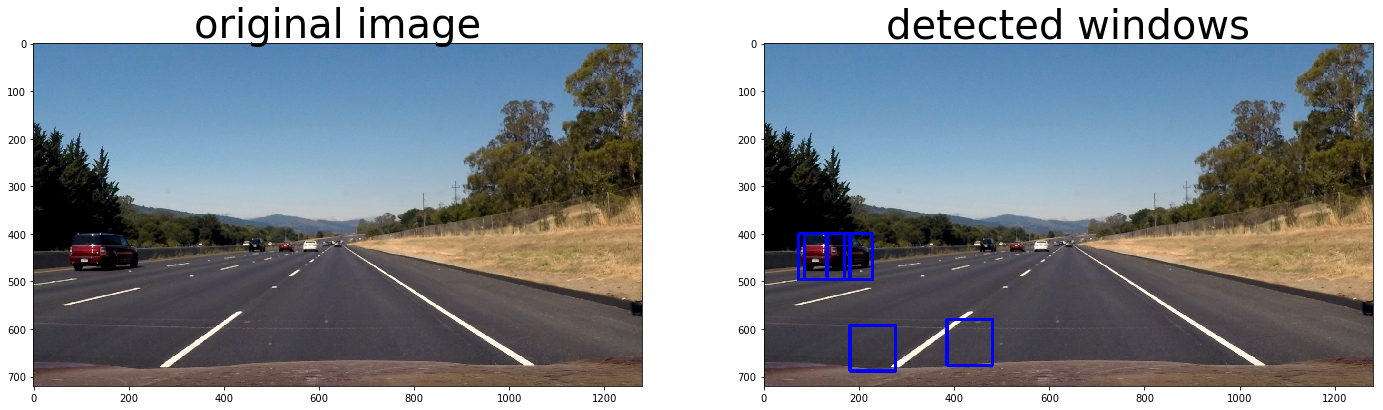

find cars cspace is  RGB
(720, 1280, 3)


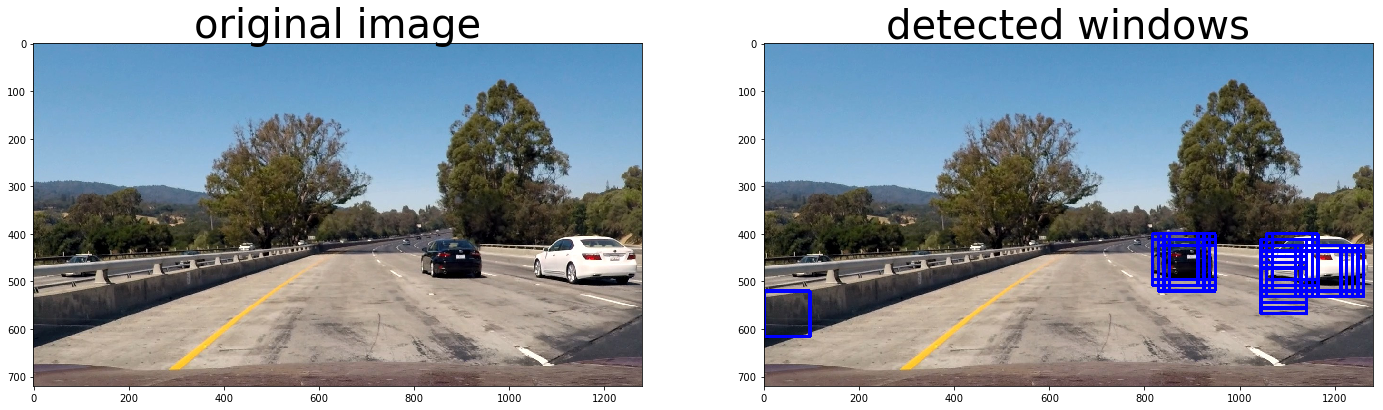

find cars cspace is  RGB
(720, 1280, 3)


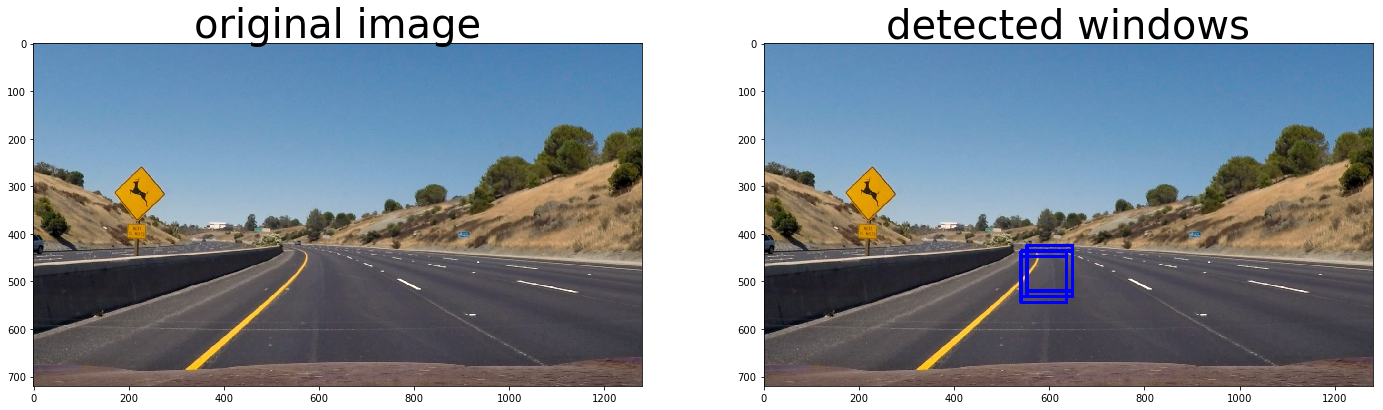

find cars cspace is  RGB
(720, 1280, 3)


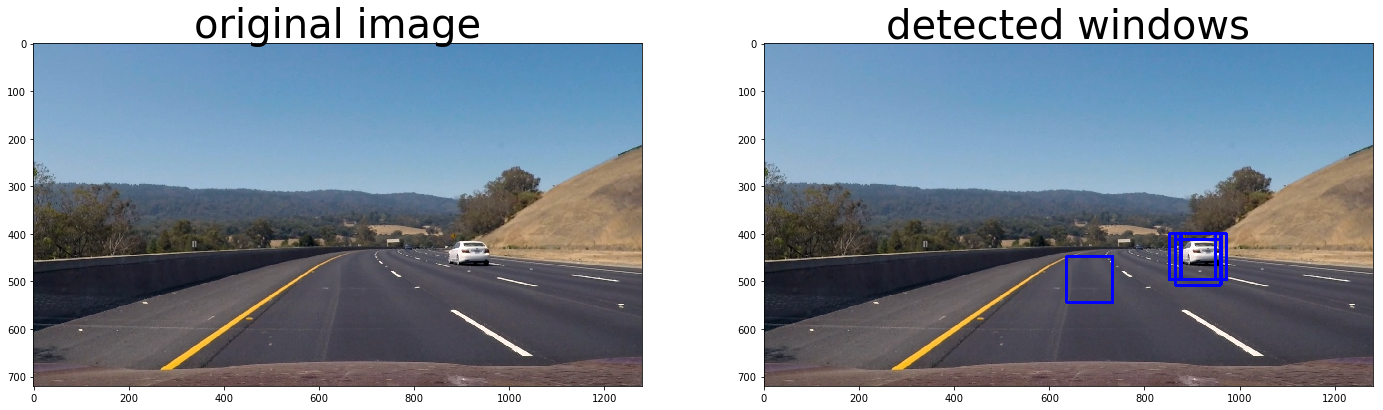

find cars cspace is  RGB
(720, 1280, 3)


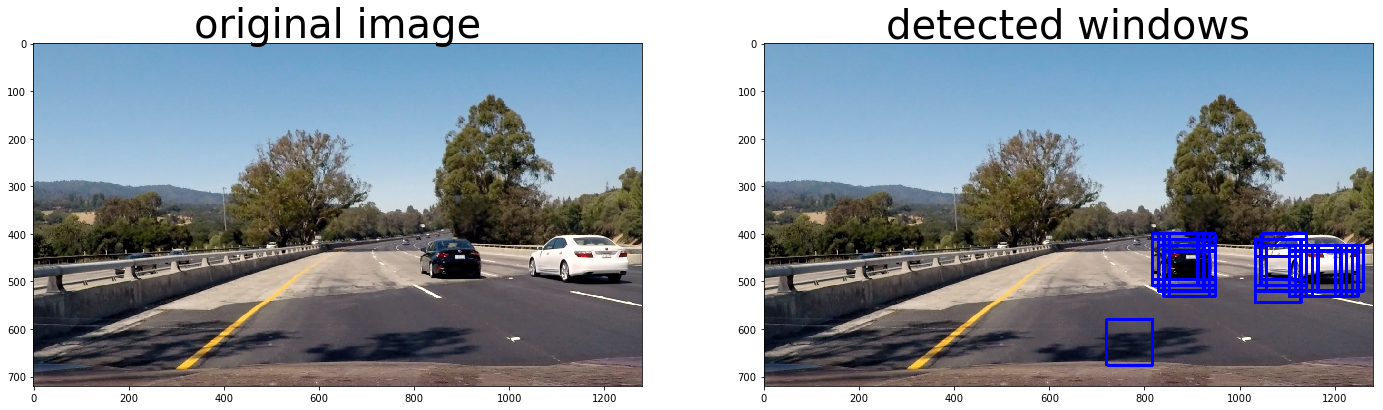

find cars cspace is  RGB
(720, 1280, 3)


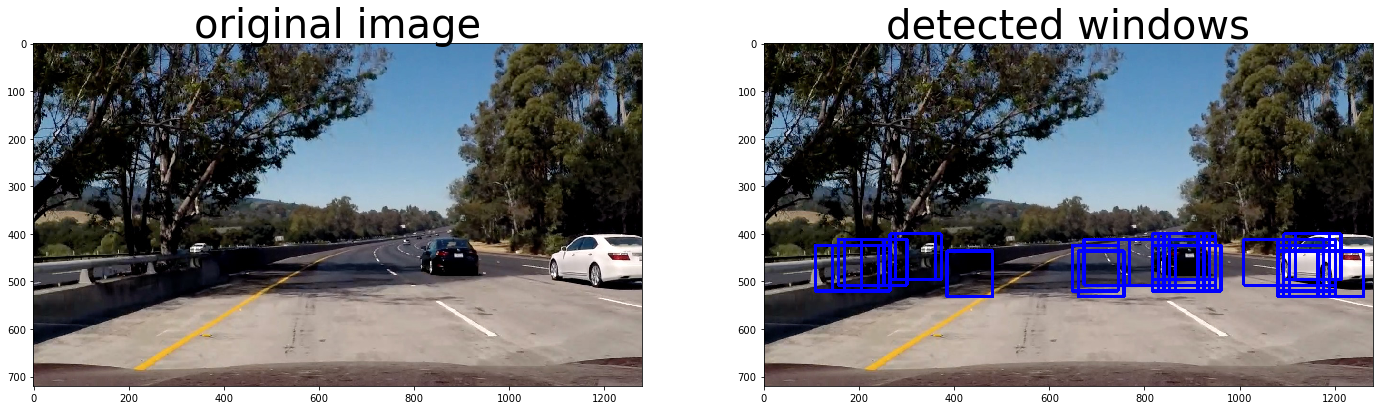

find cars cspace is  RGB
(720, 1280, 3)


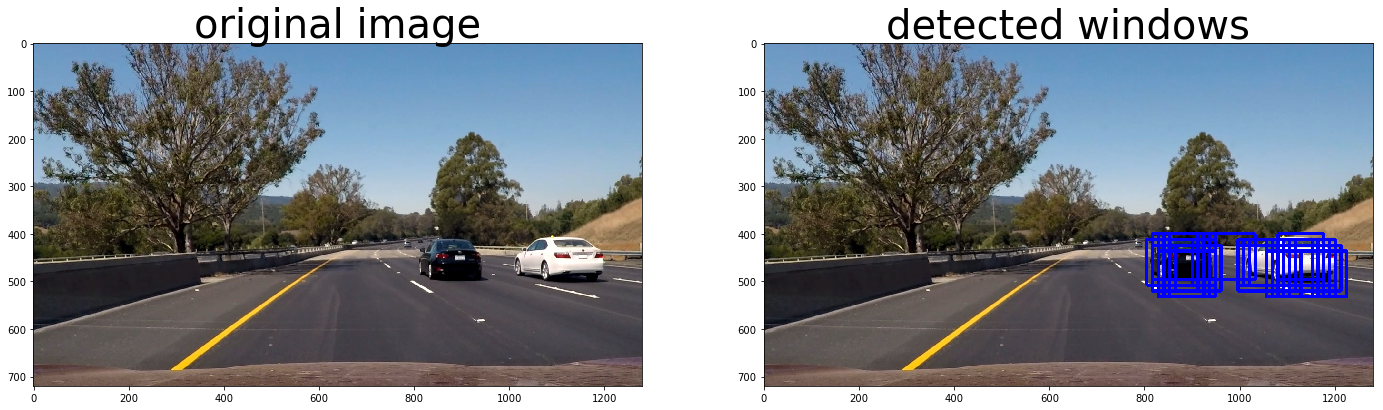

done
[((804, 412), (900, 508)), ((816, 400), (912, 496)), ((816, 412), (912, 508)), ((816, 424), (912, 520)), ((828, 400), (924, 496)), ((828, 412), (924, 508)), ((828, 424), (924, 520)), ((828, 436), (924, 532)), ((840, 400), (936, 496)), ((840, 412), (936, 508)), ((840, 424), (936, 520)), ((840, 436), (936, 532)), ((852, 400), (948, 496)), ((852, 412), (948, 508)), ((852, 424), (948, 520)), ((852, 436), (948, 532)), ((864, 424), (960, 520)), ((936, 400), (1032, 496)), ((996, 412), (1092, 508)), ((996, 424), (1092, 520)), ((1008, 412), (1104, 508)), ((1020, 412), (1116, 508)), ((1056, 412), (1152, 508)), ((1056, 424), (1152, 520)), ((1056, 436), (1152, 532)), ((1068, 412), (1164, 508)), ((1068, 424), (1164, 520)), ((1068, 436), (1164, 532)), ((1080, 400), (1176, 496)), ((1080, 412), (1176, 508)), ((1080, 424), (1176, 520)), ((1080, 436), (1176, 532)), ((1092, 412), (1188, 508)), ((1092, 424), (1188, 520)), ((1092, 436), (1188, 532)), ((1104, 412), (1200, 508)), ((1104, 424), (1200, 52

In [6]:
# Pull in test Image
image = mpimg.imread('media/test_images/test3.jpg')

# Load the data and trained model weights
scaled_data = pickle.load(open(fname,'rb'))
svc = pickle.load(open('svc.pickle','rb'))    
X_scaler = scaled_data["X_scaler"]

ystart = 400
ystop = 700
scale = 1.5

input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        win,img = find_cars(image, ystart, ystop, scale, svc, X_scaler,cspace, orient, 
                            pix_per_cell, cell_per_block)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(image)
    ax1.set_title('original image', fontsize=40)
    ax2.imshow(img)
    ax2.set_title('detected windows', fontsize=40)
    plt.show()
print("done")
print(win)



In [7]:
# test function above - find_cars
image = mpimg.imread('media/test_images/test3.jpg')

y_half = image.shape[0] // 2
y_end = image.shape[0] #- (y_half % 64)
ystart = [y_half,y_half+100]
ystop = [y_end-100, y_end]
scale = [1.2,2.5]
#ystart = [400]
#ystop = [700]
#scale = [1.5]
point_scale_data = np.vstack((ystart,ystop,scale))
print(point_scale_data)
windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, cell_per_block, 
                                         point_scale_data)


print(windows)
print(len(windows))

[[ 360.   460. ]
 [ 620.   720. ]
 [   1.2    2.5]]
search_with_multiscale cspace is  RGB
find cars cspace is  RGB
(720, 1280, 3)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


find cars cspace is  RGB
(720, 1280, 3)
[((153, 388), (229, 464)), ((163, 388), (239, 464)), ((163, 398), (239, 474)), ((172, 379), (248, 455)), ((432, 369), (508, 445)), ((624, 484), (700, 560)), ((864, 408), (940, 484)), ((873, 398), (949, 474)), ((873, 408), (949, 484)), ((873, 417), (949, 493)), ((883, 398), (959, 474)), ((883, 408), (959, 484)), ((883, 417), (959, 493)), ((892, 408), (968, 484)), ((892, 417), (968, 493)), ((600, 480), (760, 640)), ((600, 520), (760, 680))]
17


search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)


C:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


find cars cspace is  YCrCb
(720, 1280, 3)


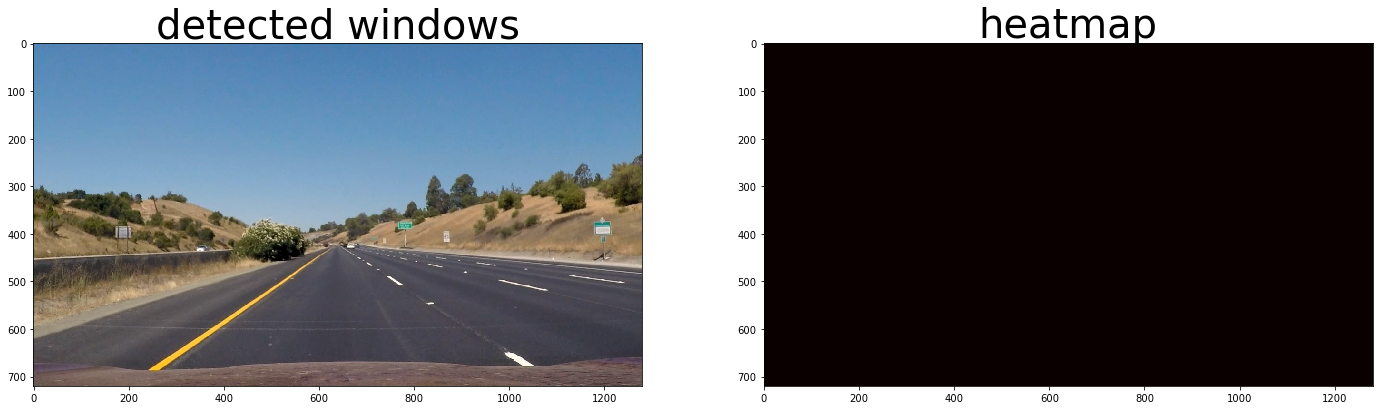

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


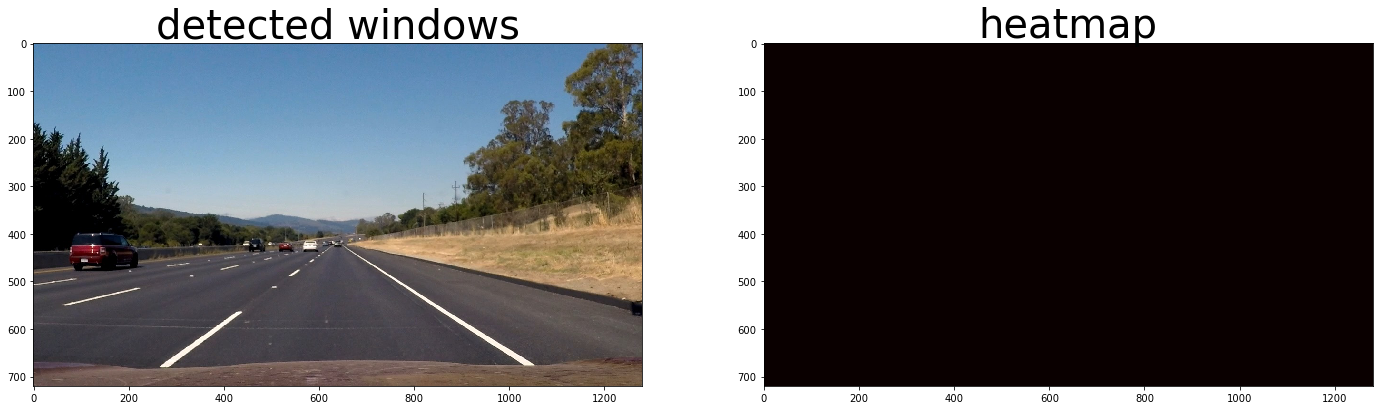

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


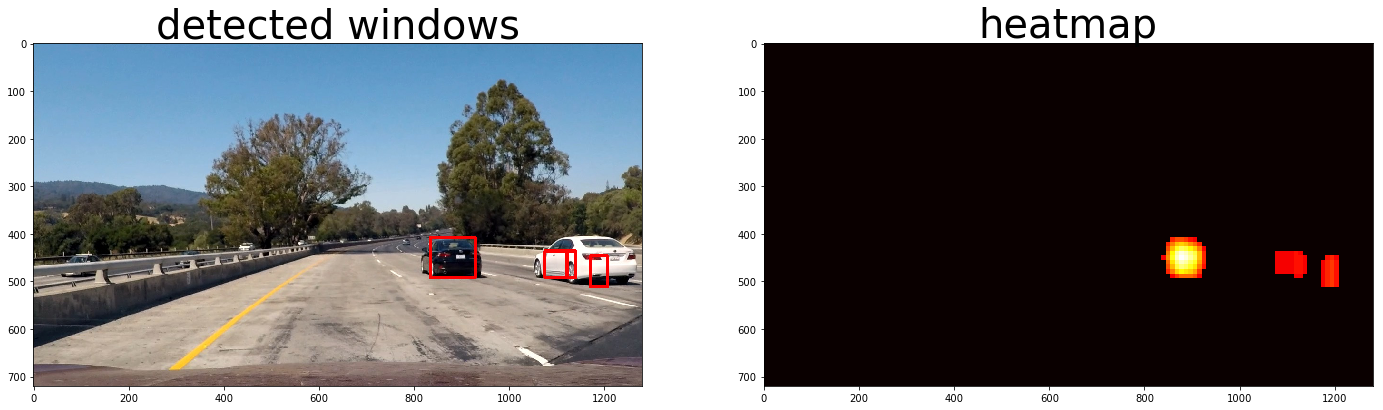

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


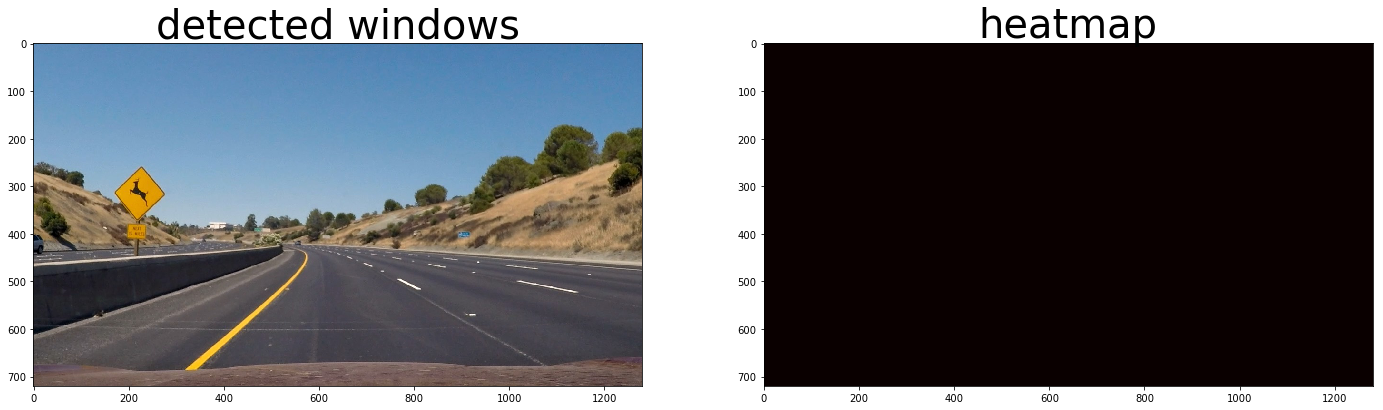

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


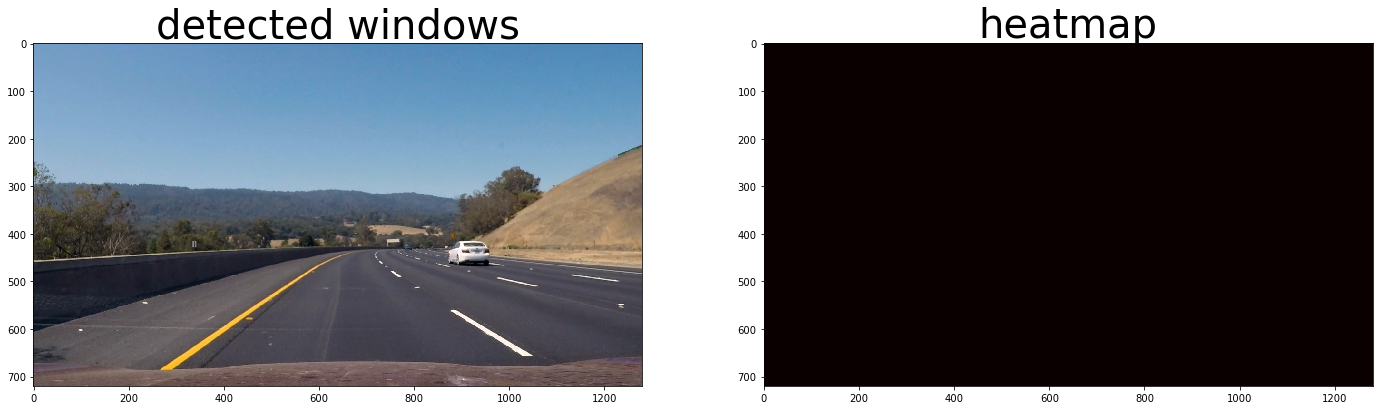

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


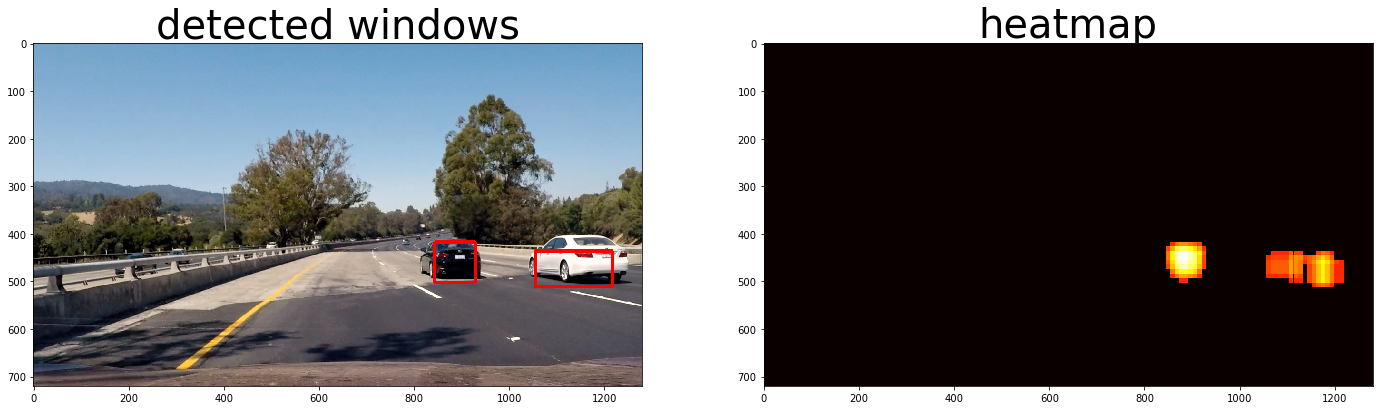

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


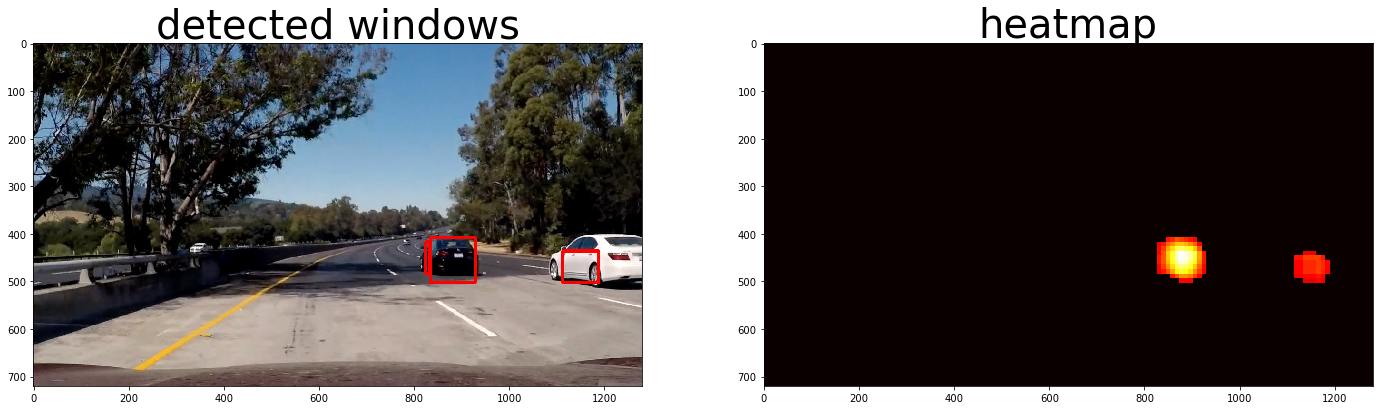

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


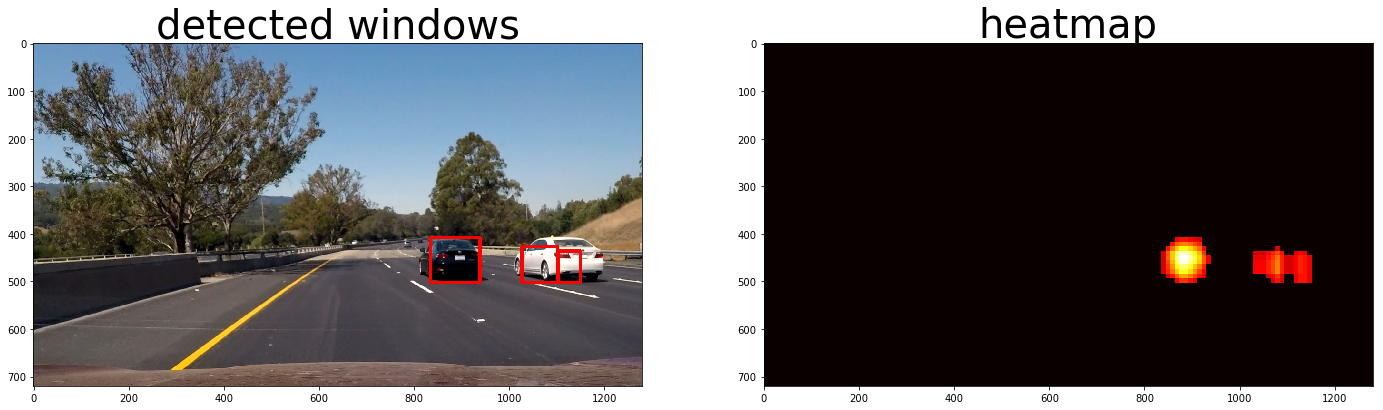

done


In [8]:


# test multiscale window search and heatmap
cspace = "YCrCb"
input_directory = 'media/test_images/'
files = os.listdir(input_directory)
for file in files:
    filename,ext = os.path.splitext(file)
    if ext == '.jpg':
        image = mpimg.imread(input_directory + file)    

        # When moving function to outside script, had to pass all the arguments
        # Not sure what side effects this caused
        img,heat = test_image(image,cspace,orient,pix_per_cell,cell_per_block,point_scale_data)

    f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
    ax1.imshow(img)
    ax1.set_title('detected windows', fontsize=40)
    ax2.imshow(heat, cmap='hot')
    ax2.set_title('heatmap', fontsize=40)
    plt.show()
print("done")


In [ ]:
from collections import deque
from moviepy.editor import VideoFileClip

# HOG sub-sampling to search through the image
def find_cars(img, ystart, ystop, scale, svc, X_scaler, cspace, orient, pix_per_cell, 
              cell_per_block, spatial_size=(32,32), hist_bins=32):
    draw_img = np.copy(img)
    print('find cars cspace is ',cspace)
    # search through image
    print(np.shape(img))
    img_search = img[ystart:ystop,:,:]
    # define window list to draw
    win_list = []
    ctrans_search = convert_color(img_search, conv=cspace)
    # change imagesize when scale is not 1.0 
    if scale != 1:
        imshape = ctrans_search.shape
        ctrans_search = cv2.resize(ctrans_search, (np.int(imshape[1]/scale),
                                                   np.int(imshape[0]/scale)))
    # set channels 
    ch1 = ctrans_search[:,:,0]
    ch2 = ctrans_search[:,:,1]
    ch3 = ctrans_search[:,:,2]
    
    # Define block, steps 
    nx_blocks = (ch1.shape[1] // pix_per_cell) - 1
    ny_blocks = (ch1.shape[0] // pix_per_cell) - 1
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the original sampling rate, with 8 cells and 8 pix per cell
    window = 64
    # Define number of blocks per window 
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    # Instead of overlap, define how many cells in each step
    cells_per_step = 2
    nxsteps = (nx_blocks - nblocks_per_window) // cells_per_step
    nysteps = (ny_blocks - nblocks_per_window) // cells_per_step
    
    # Compute HOG features at each channel 
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xblock in range(nxsteps):
        for yblock in range(nysteps):
            ypos = yblock*cells_per_step
            xpos = xblock*cells_per_step
            
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window,
                             xpos:xpos+nblocks_per_window].ravel()
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window,
                             xpos:xpos+nblocks_per_window].ravel()
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window,
                             xpos:xpos+nblocks_per_window].ravel()
            
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))
            
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
            
            # Extract the image patch
            sub_img = cv2.resize(ctrans_search[ytop:ytop+window, xleft:xleft+window], (64,64))
            
            # get color features
            spatial_features = bin_spatial(sub_img, size=spatial_size)
            hist_features = color_hist(sub_img, nbins=hist_bins,bins_range=(0,256))
            
            # scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features,
                                                          hog_features)))
            #test_features = np.array(test_features)
            test_prediction = svc.predict(test_features)

            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                win_list.append(((xbox_left, ytop_draw+ystart),
                                 (xbox_left+win_draw, ytop_draw+win_draw+ystart)))
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),
                              (xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6)
                
    return win_list ,draw_img


iteration = 1

# keep current heatmaps
heatmaps = deque(maxlen=10)
def process_video(image):
    cimg = np.copy(image)
    windows = search_with_multiscale_windows(image, cspace, orient, pix_per_cell, cell_per_block,
                                             point_scale_data)

    #print("iterations: ",iteration)
    global iteration, heatmaps
    if len(windows) > 0:
        heat = np.zeros_like(image[:,:,0]).astype(np.float)
        heat = add_heat(heat, windows)
        heatmaps.append(heat)
        #print(len(heatmaps))
        # take recent 10 heatmaps and average them
        if len(heatmaps) == 10:
            avg_heat = sum(heatmaps)/len(heatmaps)
            heat = avg_heat
        heat = apply_threshold(heat,15)
        heatmap = np.clip(heat, 0, 255)
        #heatmaps.append(heatmap)
        #if iteration % 10 == 0:
        #    heatmap = avg_heatmaps
        labels = label(heatmap)
        draw_img = draw_labeled_windows(cimg, labels)
    else:
        # pass the image itself if nothing was detected
        draw_img = cimg
    iteration += 1
    return draw_img

# test on short video
output_name = 'testing_video_thresh.mp4'
#clip1 = VideoFileClip("media/project_video.mp4")
clip0 = VideoFileClip("media/project_video.mp4").subclip(10,25)
clipping = clip0.fl_image(process_video)
%time clipping.write_videofile(output_name, audio=False)



search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)
[MoviePy] >>>> Building video testing_video_thresh.mp4
[MoviePy] Writing video testing_video_thresh.mp4


  0%|                                                                                          | 0/126 [00:00<?, ?it/s]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  1%|▋                                                                                 | 1/126 [00:04<08:38,  4.15s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  2%|█▎                                                                                | 2/126 [00:08<08:30,  4.12s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  2%|█▉                                                                                | 3/126 [00:12<08:28,  4.13s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  3%|██▌                                                                               | 4/126 [00:16<08:25,  4.15s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  4%|███▎                                                                              | 5/126 [00:20<08:20,  4.14s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  5%|███▉                                                                              | 6/126 [00:24<08:17,  4.15s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  6%|████▌                                                                             | 7/126 [00:28<08:12,  4.14s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  6%|█████▏                                                                            | 8/126 [00:33<08:08,  4.14s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  7%|█████▊                                                                            | 9/126 [00:37<08:07,  4.16s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  8%|██████▍                                                                          | 10/126 [00:41<07:59,  4.13s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
find cars cspace is  YCrCb
(720, 1280, 3)


  9%|███████                                                                          | 11/126 [00:45<07:48,  4.07s/it]

search_with_multiscale cspace is  YCrCb
find cars cspace is  YCrCb
(720, 1280, 3)
